In [2]:
import pandas
import numpy as np

# Data Preparation

In [3]:
trainDataFile = 'ijcnlp_dailydialog/train/dialogues_train.txt'
trainLabelsFile = 'ijcnlp_dailydialog/train/dialogues_act_train.txt' 

In [4]:
testDataFile = 'ijcnlp_dailydialog/validation/dialogues_validation.txt'
testLablesFile = 'ijcnlp_dailydialog/validation/dialogues_act_validation.txt'

In [5]:
lineSeparator = '__eou__'

In [6]:
def getData(dialogueFile, labelFile):
    with open(dialogueFile) as f:
        lines = f.readlines() 
    with open(labelFile) as f:
        labels = f.readlines()    
    
    inputs = []
    for line in lines:
        line = line.rstrip()
        line = line.split(lineSeparator)
        inputs.extend(line[:-1])
    
    acts = []
    for label in labels:
        label = label.rstrip()
        label = label.split()
        acts.extend(label)
        
    return (inputs, acts)

In [7]:
with open(trainDataFile) as f:
    lines = f.readlines()

In [8]:
with open(trainLabelsFile) as f:
    labels = f.readlines()

In [9]:
len(labels)

11118

In [10]:
len(lines)

11118

In [11]:
lines[0]

"Say , Jim , how about going for a few beers after dinner ? __eou__ You know that is tempting but is really not good for our fitness . __eou__ What do you mean ? It will help us to relax . __eou__ Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? __eou__ I guess you are right.But what shall we do ? I don't feel like sitting at home . __eou__ I suggest a walk over to the gym where we can play singsong and meet some of our friends . __eou__ That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . __eou__ Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . __eou__ Good.Let ' s go now . __eou__ All right . __eou__\n"

In [56]:
lines[0].rstrip().split('__eou__')[:-1]

['Say , Jim , how about going for a few beers after dinner ? ',
 ' You know that is tempting but is really not good for our fitness . ',
 ' What do you mean ? It will help us to relax . ',
 " Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? ",
 " I guess you are right.But what shall we do ? I don't feel like sitting at home . ",
 ' I suggest a walk over to the gym where we can play singsong and meet some of our friends . ',
 " That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . ",
 ' Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . ',
 " Good.Let ' s go now . ",
 ' All right . ']

In [48]:
labels[0]

'3 4 2 2 2 3 4 1 3 4 \n'

In [20]:
lines[0].count('__eou__')

10

In [21]:
labels[0].count(' ')

10

In [12]:
inputs = []
for line in lines:
    line = line.rstrip()
    line = line.split(lineSeparator)
    inputs.extend(line[:-1])

In [13]:
inputs[-4:]

[' Take a look at the ones on display , please . ',
 ' I need size 41 . ',
 'Could I have the check , please ? ',
 " Okay . I'll just be a minute . "]

In [14]:
acts = []
for label in labels:
    label = label.rstrip()
    label = label.split()
    acts.extend(label)

In [31]:
len(inputs)

87170

In [32]:
len(acts)

87170

In [15]:
class Data: pass

In [16]:
dialogues = Data()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
count_vect = CountVectorizer()

In [19]:
trainX, trainY = getData(trainDataFile, trainLabelsFile)

In [33]:
trainX[0]

'Say , Jim , how about going for a few beers after dinner ? '

In [20]:
trainX = count_vect.fit_transform(trainX)

In [59]:
valX, valY = getData(testDataFile, testLablesFile)

In [134]:
valX = count_vect.transform(valX)

# Train a classifier

In [23]:
from sklearn.linear_model import LogisticRegression

In [130]:
model = LogisticRegression(n_jobs=-1)

In [25]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_estimators=100)

In [131]:
model.fit(trainX, trainY)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluation

In [132]:
from sklearn import metrics

In [135]:
preds = model.predict(valX)

In [136]:
preds

array(['1', '1', '3', ..., '2', '1', '1'], dtype='<U1')

In [137]:
probs = model.predict_proba(valX)

In [44]:
# len(probs)
valX.shape

(8069, 17635)

In [138]:
probs[1]

array([0.53760054, 0.04204305, 0.0549108 , 0.36544561])

In [139]:
metrics.accuracy_score(valY, model.predict(valX))

0.6740612219605899

In [140]:
metrics.accuracy_score(trainY, model.predict(trainX))

0.7616267064357004

In [33]:
print(metrics.classification_report(valY, model.predict(valX)))

             precision    recall  f1-score   support

          1       0.67      0.87      0.76      3125
          2       0.83      0.85      0.84      2244
          3       0.78      0.54      0.64      1775
          4       0.66      0.34      0.45       925

avg / total       0.74      0.73      0.72      8069



In [34]:
cmat = metrics.confusion_matrix(valY, model.predict(valX))

In [35]:
cmat.diagonal()/cmat.sum(axis=1)

array([0.87136   , 0.84803922, 0.54366197, 0.33945946])

In [36]:
cmat

array([[2723,  163,  129,  110],
       [ 242, 1903,   85,   14],
       [ 593,  178,  965,   39],
       [ 501,   46,   64,  314]])

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import itertools

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
classes = ['inform', 'question', 'directive', 'commisive']

Confusion matrix, without normalization
[[2723  158  136  108]
 [ 248 1908   76   12]
 [ 585  186  960   44]
 [ 516   46   52  311]]


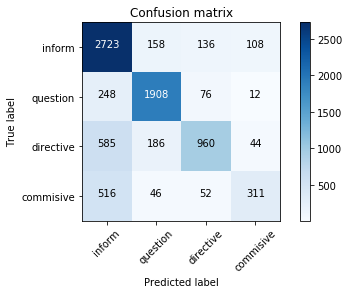

In [59]:
plot_confusion_matrix(cmat, classes)

Normalized confusion matrix
[[0.87136    0.05056    0.04352    0.03456   ]
 [0.11051693 0.85026738 0.03386809 0.00534759]
 [0.32957746 0.10478873 0.54084507 0.02478873]
 [0.55783784 0.04972973 0.05621622 0.33621622]]


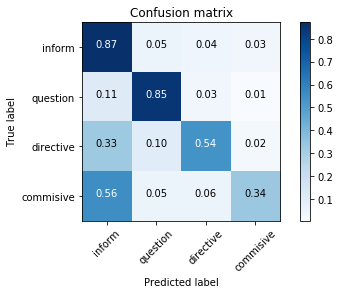

In [60]:
plot_confusion_matrix(cmat, classes, normalize=True)

In [66]:
correctPerClass = {}
totalPerClass   = {}
for cls in ['1','2','3','4']:
    correctPerClass[cls] = 0
    totalPerClass[cls]   = 0
for yt, yp in zip(valY, preds):
    totalPerClass[yt] += 1
    correctPerClass[yt] += int(yt==yp)



In [67]:
totalPerClass

{'1': 3125, '2': 2244, '3': 1775, '4': 925}

In [68]:
correctPerClass

{'1': 2723, '2': 1908, '3': 960, '4': 311}

In [69]:
for cls in ['1','2','3','4']:
    acc = correctPerClass[cls]/totalPerClass[cls]
    print("Accuracy for class ", cls, " :", acc)

Accuracy for class  1  : 0.87136
Accuracy for class  2  : 0.8502673796791443
Accuracy for class  3  : 0.5408450704225352
Accuracy for class  4  : 0.3362162162162162


In [27]:
label

['3', '4']

In [24]:
line

['Could I have the check , please ? ', " Okay . I'll just be a minute . ", '']

In [21]:
line.split(lineSeparator)

['Could I have the check , please ? ', " Okay . I'll just be a minute . ", '']

In [22]:
lines[-1]

"Could I have the check , please ? __eou__ Okay . I'll just be a minute . __eou__\n"

In [74]:
def run_viterbi(emission_scores, trans_scores, start_scores, end_scores):
    """Run the Viterbi algorithm.

    N - number of tokens (length of sentence)
    L - number of labels

    As an input, you are given:
    - Emission scores, as an NxL array
    - Transition scores (Yp -> Yc), as an LxL array
    - Start transition scores (S -> Y), as an Lx1 array
    - End transition scores (Y -> E), as an Lx1 array

    You have to return a tuple (s,y), where:
    - s is the score of the best sequence
    - y is the size N array/seq of integers representing the best sequence.
    """
    L = start_scores.shape[0]
    assert end_scores.shape[0] == L
    assert trans_scores.shape[0] == L
    assert trans_scores.shape[1] == L
    assert emission_scores.shape[1] == L
    N = emission_scores.shape[0]

    y = []
    T = np.zeros((N,L))
    best_Ys = np.zeros((N,L))

    for i in range(L):
        T[0][i] = emission_scores[0][i] + start_scores[i]
        if N <= 1:
                T[0][i] += end_scores[i]


    for i in range(1,N):
        for j in range(0,L):
            maxSoFar = -np.inf
            maxLabel = 0
            for k in range(L):
                if(trans_scores[k][j] + T[i-1][k] > maxSoFar):
                    maxSoFar = trans_scores[k][j] + T[i-1][k]
                    maxLabel = k
            best_Ys[i][j] = maxLabel
            T[i][j] = maxSoFar + emission_scores[i][j]
            if i == N-1:
                T[i][j] += end_scores[j]

    best_Ys = np.int_(best_Ys)
    maxY = 0
    maxScore = -np.inf
    for i in range(L):
        if T[N-1][i] > maxScore:
            maxScore = T[N-1][i]
            maxY = i
    y.append(maxY) 
    # print("best_Ys: ", best_Ys)
    # print("T: ", T)

    for i in reversed(range(N)):
        y.append(best_Ys[i, int(y[-1])])

    y = y[:-1]
    # print "y values is:", y[::-1], maxScore
    return (maxScore, y[::-1])

In [141]:
transition_matrix = [[0.37, 0.44, 0.17, 0.02], [0.77, 0.10, 0.13, 0.01], [0.06, 0.24, 0.11, 0.58], [0.35, 0.25, 0.38, 0.02]]
transition_matrix

[[0.37, 0.44, 0.17, 0.02],
 [0.77, 0.1, 0.13, 0.01],
 [0.06, 0.24, 0.11, 0.58],
 [0.35, 0.25, 0.38, 0.02]]

In [51]:
valX

<8069x17635 sparse matrix of type '<class 'numpy.int64'>'
	with 78340 stored elements in Compressed Sparse Row format>

In [142]:
def data_sentence_lengths(dialogueFile, labelFile):
    with open(dialogueFile) as f:
        lines = f.readlines() 
    with open(labelFile) as f:
        labels = f.readlines()
    inputs = []        
    for line in lines:
        line = line.rstrip()
        line = line.split(lineSeparator)
        inputs.append(len(line[:-1])) 
    return inputs
        
    
def getData(dialogueFile, labelFile):
    with open(dialogueFile) as f:
        lines = f.readlines() 
    with open(labelFile) as f:
        labels = f.readlines()    
    
    inputs = []
    for line in lines:
        line = line.rstrip()
        line = line.split(lineSeparator)
        inputs.extend(line[:-1])
    
    acts = []
    for label in labels:
        label = label.rstrip()
        label = label.split()
        acts.extend(label)
        
    return (inputs, acts)

In [143]:
probs[0:3]
a = [[1,1,1],[1,1,1]]
b = [2,3,4]
a = np.asarray(a)
b = np.asarray(b)
(a.T / b.reshape(3,1)).T

array([[0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      ]])

In [144]:
emission_matrix = []
sentence_lengths = data_sentence_lengths(testDataFile, testLablesFile)
ind = 0
# i = sentence_lengths[0]
# emission_matrix = probs[ind:i+1]
# start_scores = [0,0,0,0]
# end_scores = [0,0,0,0]
# emission_matrix = np.asarray(emission_matrix)
# transition_matrix = np.asarray(transition_matrix)
# start_scores = np.asarray(start_scores)
# end_scores = np.asarray(end_scores)
temp = np.ones((4,4))
probs_np = np.asarray(probs)
probs_each = np.array([0.452, 0.286, 0.168, 0.094])
probs_normalised = (probs_np.T/probs_each.reshape(4,1)).T
# # run_viterbi(emission_matrix, temp, start_scores, end_scores)
# run_viterbi(emission_matrix, transition_matrix, start_scores, end_scores)
results = []
print(len(sentence_lengths))
print(len(probs))
print(sum(sentence_lengths))
for i in sentence_lengths:
#     print(i)
    emission_matrix = probs_normalised[ind:ind+i]
    start_scores = [0,0,0,0]
    end_scores = [0,0,0,0]
    emission_matrix = np.asarray(emission_matrix)
    transition_matrix = np.asarray(transition_matrix)
#     print(emission_matrix)
    start_scores = np.asarray(start_scores)
    end_scores = np.asarray(end_scores)
    (score, seq) = run_viterbi(emission_matrix, transition_matrix, start_scores, end_scores)
#     (score, seq) = run_viterbi(emission_matrix, temp, start_scores, end_scores)
    if len(seq) != i:
        print("Mismatch", ind)
        print(seq)
    results.extend(seq)
    ind += i

1000
8069
8069


In [148]:
probs_normalised

array([[0.93735648, 1.28056853, 0.45906154, 1.41436099],
       [1.18938173, 0.14700367, 0.32684997, 3.88771929],
       [0.4051075 , 0.19086249, 4.25270093, 0.509053  ],
       ...,
       [0.2149652 , 3.04117905, 0.1137825 , 0.14833044],
       [1.45858176, 0.4799067 , 0.68748109, 0.93586067],
       [1.03171936, 1.43460712, 0.21853837, 0.9218167 ]])

In [145]:
len(results)

8069

In [146]:
results
results = list(map(lambda x: str(x+1), results))
# results.map(x -> str(x+1))

In [147]:
metrics.accuracy_score(valY, results)

0.6750526707150825

In [80]:
emission_matrix

array([[0.4       , 0.4175    , 0.12916667, 0.05333333],
       [0.53      , 0.34      , 0.03      , 0.1       ],
       [0.30625   , 0.1       , 0.54375   , 0.05      ],
       [0.11      , 0.74      , 0.05      , 0.1       ],
       [0.72611317, 0.02905492, 0.11      , 0.1348319 ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.22480371, 0.        , 0.14518594, 0.63001035],
       [0.45314286, 0.24      , 0.18685714, 0.12      ]])

In [79]:
valY[0:9]

['2', '1', '3', '2', '1', '2', '1', '2', '1']

In [68]:
np.zeros(3)

array([0., 0., 0.])

In [78]:
transition_matrix

array([[0.37, 0.44, 0.17, 0.02],
       [0.77, 0.1 , 0.13, 0.01],
       [0.06, 0.24, 0.11, 0.58],
       [0.35, 0.25, 0.38, 0.02]])

In [77]:
valX[0:9]

['Good morning , sir . Is there a bank near here ? ',
 ' There is one . 5 blocks away from here ? ',
 " Well , that's too far.Can you change some money for me ? ",
 ' Surely , of course . What kind of currency have you got ? ',
 ' RIB . ',
 ' How much would you like to change ? ',
 ' 1000 Yuan.Here you are . ',
 'Good afternoon . This is Michelle Li speaking , calling on behalf of IBA . Is Mr Meng available at all ? ',
 ' This is Mr Meng speaking , Michelle . ']

In [63]:
valX

['Good morning , sir . Is there a bank near here ? ',
 ' There is one . 5 blocks away from here ? ',
 " Well , that's too far.Can you change some money for me ? ",
 ' Surely , of course . What kind of currency have you got ? ',
 ' RIB . ',
 ' How much would you like to change ? ',
 ' 1000 Yuan.Here you are . ',
 'Good afternoon . This is Michelle Li speaking , calling on behalf of IBA . Is Mr Meng available at all ? ',
 ' This is Mr Meng speaking , Michelle . ',
 " Oh , hello ! Sorry about that . I'm just calling to say that we've received your new Corporate Credit Card from HQ . ",
 " That was quick ! I wasn't expecting it until later this week . ",
 ' Yes , our application procedures have speeded up since we started using the new fast-track system . ',
 ' Shall I come in and collect it ? ',
 " Or we can send it to you . But if you would like to use it at the ATM , you'll need to wait for your PIN number . ",
 ' Mmmm ... if I come in and collect it this afternoon , is there any way I 

In [66]:
probs[0:3]

array([[0.4       , 0.4175    , 0.12916667, 0.05333333],
       [0.53      , 0.34      , 0.03      , 0.1       ],
       [0.30625   , 0.1       , 0.54375   , 0.05      ]])